In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline


In [145]:
def to_class(x):
    if x==1:
        return +1
    else:
        return -1

lenc = LabelEncoder()

In [242]:
df_Xtr0 = pd.read_csv('split_Xtr0.csv', header=None)

dfy_Ytr0 = pd.read_csv('Ytr0.csv' )
list(dfy_Ytr0.columns.values)
dfy_Ytr0=dfy_Ytr0.drop(["Unnamed: 0"], axis=1)
dfy_Ytr0 = dfy_Ytr0.applymap(to_class)

df_Xtr0 = df_Xtr0.apply(lenc.fit_transform)

df_Xte0 = pd.read_csv('split_Xte0.csv', header=None)
df_Xte0 = df_Xte0.apply(lenc.fit_transform)
df_Xte0.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,0,2,0,3,2,2,1,2,1,...,1,0,0,0,2,2,2,1,0,0
1,2,1,1,1,0,0,2,0,3,0,...,0,3,2,0,1,1,1,0,0,0
2,2,3,3,1,3,1,3,1,1,0,...,0,1,0,3,0,2,3,1,1,0
3,3,1,2,0,2,3,2,0,3,2,...,0,2,0,3,1,1,0,3,3,1
4,1,3,3,1,3,0,0,2,0,0,...,1,0,0,0,1,0,3,3,0,3


In [152]:
df_Xtr1 = pd.read_csv('split_Xtr1.csv', header=None)
dfy_Ytr1 = pd.read_csv('Ytr1.csv' )
list(dfy.columns.values)
dfy_Ytr1=dfy_Ytr1.drop(["Unnamed: 0"], axis=1)
dfy_Ytr1.head()
dfy_Ytr1 = dfy_Ytr1.applymap(to_class)
df_Xtr1 = df_Xtr1.apply(lenc.fit_transform)
df_Xtr1.head()

df_Xte1 = pd.read_csv('split_Xte1.csv', header=None)
df_Xte1 = df_Xte1.apply(lenc.fit_transform)
df_Xte1.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1,3,1,0,1,1,3,2,1,...,3,2,0,2,2,2,2,1,2,2
1,3,1,3,0,2,1,1,2,1,1,...,3,2,0,3,2,2,0,2,0,2
2,1,2,2,1,3,0,0,3,2,2,...,0,2,0,2,2,0,2,1,3,2
3,0,1,0,1,1,2,3,2,1,3,...,2,0,0,1,1,1,3,3,1,2
4,3,1,0,2,1,1,3,0,0,1,...,1,3,2,0,1,1,0,0,3,0


In [153]:
df_Xtr2 = pd.read_csv('split_Xtr2.csv', header=None)
dfy_Ytr2 = pd.read_csv('Ytr2.csv' )
list(dfy.columns.values)
dfy_Ytr2=dfy_Ytr2.drop(["Unnamed: 0"], axis=1)
dfy_Ytr2 = dfy_Ytr2.applymap(to_class)
df_Xtr2 = df_Xtr2.apply(lenc.fit_transform)
df_Xtr2.head()

df_Xte2 = pd.read_csv('split_Xte2.csv', header=None)
df_Xte2 = df_Xte2.apply(lenc.fit_transform)
df_Xte2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,3,1,2,3,1,3,3,3,2,...,0,0,0,0,0,2,1,1,3,2
1,2,3,2,0,3,2,1,0,3,3,...,3,3,3,3,0,3,2,3,1,3
2,0,1,1,0,3,2,1,0,0,3,...,1,3,0,0,1,0,0,3,1,0
3,1,1,3,3,3,2,0,0,0,0,...,1,0,0,0,0,3,1,3,1,3
4,1,1,3,1,1,3,2,1,1,0,...,3,1,3,2,2,2,1,0,2,1


In [34]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [35]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [36]:
preproData.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
intercept,2000.0,1.000000e+00,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
0,2000.0,-4.241052e-17,1.00025,-1.249710,-1.249710,-0.401299,1.295524,1.295524
1,2000.0,-1.820766e-16,1.00025,-1.317976,-1.317976,0.401497,1.261234,1.261234
2,2000.0,-2.524647e-16,1.00025,-1.274420,-1.274420,-0.416225,1.300166,1.300166
3,2000.0,2.846612e-16,1.00025,-1.290012,-1.290012,0.416918,1.270382,1.270382


<h1> Testing samples </h1>

In [59]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
XTrain, XTest, yTrain, yTest = train_test_split(num_features,dfy.values.ravel(),test_size = 0.25) # split data in two

In [60]:
modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(XTrain,yTrain)
yPred = modelSVMLinear.predict(XTest)

<h1> To change datasets </h1>


In [243]:
########to change to 1st dataset
XTrain = df_Xtr0
XTest= df_Xte0
yTrain= dfy_Ytr0.values.ravel()

XTest

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,0,2,0,3,2,2,1,2,1,...,1,0,0,0,2,2,2,1,0,0
1,2,1,1,1,0,0,2,0,3,0,...,0,3,2,0,1,1,1,0,0,0
2,2,3,3,1,3,1,3,1,1,0,...,0,1,0,3,0,2,3,1,1,0
3,3,1,2,0,2,3,2,0,3,2,...,0,2,0,3,1,1,0,3,3,1
4,1,3,3,1,3,0,0,2,0,0,...,1,0,0,0,1,0,3,3,0,3
5,1,0,1,3,2,3,0,1,3,0,...,0,2,2,1,0,3,1,3,0,3
6,3,3,2,3,2,2,3,2,2,0,...,3,3,3,2,2,0,1,0,1,0
7,3,0,1,3,1,1,1,1,3,1,...,2,2,2,2,1,2,2,2,2,1
8,3,3,2,2,3,1,1,0,2,2,...,2,2,1,3,0,2,2,2,0,0
9,1,3,3,1,0,3,0,1,1,0,...,0,2,3,0,0,2,0,1,0,0


In [184]:
########to change to 2nd dataset

XTrain = df_Xtr1
XTest= df_Xte1
yTrain= dfy_Ytr1.values.ravel()

In [205]:
########to change to 3rth dataset

XTrain = df_Xtr2
XTest= df_Xte2
yTrain= dfy_Ytr2.values.ravel()

In [ ]:
modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(XTrain,yTrain)
yPred = modelSVMLinear.predict(XTest)

<h1> SGD </h1>

##SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(XTrain,yTrain)
yPred = clf.predict(XTest)

mat = confusion_matrix(yTest, yPred)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g')
plt.ylabel('true label')
plt.xlabel('predicted label')

<h1> Logistic Loss</h1>

In [244]:
lam = 0.001 #  REGULARIZATION 

m,n = XTrain.shape # SIZES: m = Number of examples n = feature size 

L = 0.25*max(np.linalg.norm(preproData.values,2,axis=1))**2 + lam # Lispchitz constant of f
mu = lam # Strong convexity constant

In [245]:
def f(x):
    A = XTrain.values
    b = yTrain
    l = 0.0
    for i in range(A.shape[0]):
        if b[i] > 0 :
            l += np.log( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
        else:
            l += np.log( 1 + np.exp(np.dot( A[i] , x ) ) ) 
    return l/m + lam/2.0*np.dot(x,x)

In [246]:
def f_grad(x):
    A = XTrain.values
    b = yTrain
    g = np.zeros(n)
    for i in range(A.shape[0]):
        if b[i] > 0:
            g += -A[i]/( 1 + np.exp(np.dot( A[i] , x ) ) ) 
        else:
            g += A[i]/( 1 + np.exp(-np.dot( A[i] , x ) ) ) 
    return g/m + lam*x

In [247]:
import timeit

def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ):
    x = np.copy(x0)
    stop = PREC*np.linalg.norm(f_grad(x0) )

    x_tab = np.copy(x)
    print("------------------------------------\n Constant Stepsize gradient\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        g = f_grad(x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

        if np.linalg.norm(g) < stop:
            break
    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [248]:
#### Parameter we give at our algorithm 
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                     # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1.99/(L)

##### gradient algorithm
x,x_tab = gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )

------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.060867815581257693
FINISHED -- 499 iterations / 5.489512s -- final value: 1.340350




In [249]:
F =  []
for i in range(x_tab.shape[0]):
    F.append(f(x_tab[i,:]))

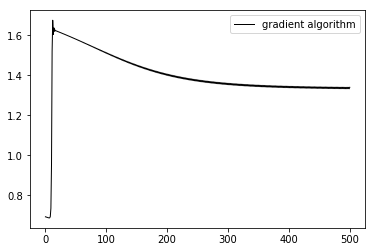

In [250]:
plt.plot(F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.legend();

In [251]:
yPredLog = np.sign( 1/(1.0 + np.exp( - (XTest.values).dot(x) )) - 0.5) # +1 if Prob (a) > 0.5

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yTest, yPredLog)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g');
plt.ylabel('true label');
plt.xlabel('predicted label');

In [ ]:
metrics.accuracy_score(yTest, yPredLog, normalize=True, sample_weight=None)

<h1>Intremental algorithm</h1>

In [252]:
def f_grad_ex(i,x):
    A = XTrain.values[i,:]
    b = yTrain[i]
    g = np.zeros(n)
    if b > 0:
        g += -A/( 1 + np.exp(np.dot( A , x ) ) ) 
    else:
        g += A/( 1 + np.exp(-np.dot( A , x ) ) ) 
    return g + lam*x/m

In [253]:
import timeit

def stochastic_gradient_algorithm(f , f_grad_ex , x0  , ITE_MAX ):
    x = np.copy(x0)

    x_tab = np.copy(x)
    print("------------------------------------\n Stochastic gradient\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        i = np.random.choice(m)
        step = 1.0/(L*(k+1)**0.7)
        
        g = f_grad_ex(i,x)
        x = x - step*g  #######  ITERATION

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [254]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point

##### gradient algorithm
x_sto,x_sto_tab = stochastic_gradient_algorithm(f , f_grad_ex , x0   , ITE_MAX )

------------------------------------
 Stochastic gradient
------------------------------------
START 
FINISHED -- 9999 iterations / 20.505292s -- final value: 0.683195




In [255]:
F_sto =  []
Ite_sto = []
for i in range(0,x_sto_tab.shape[0],int(x_sto_tab.shape[0]/500.0)):
    F_sto.append(f(x_sto_tab[i,:]))
    Ite_sto.append(i)

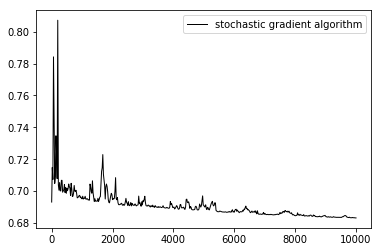

In [256]:
plt.plot(Ite_sto, F_sto, color="black", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

In [257]:
yPredsto = np.sign( 1/(1.0 + np.exp( - (XTest.values).dot(x_sto) )) - 0.5) # +1 if Prob (a) > 0.5

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yTest, yPredLog2)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g');
plt.ylabel('true label');
plt.xlabel('predicted label');

In [ ]:
metrics.accuracy_score(yTest, yPredLog2, normalize=True, sample_weight=None)

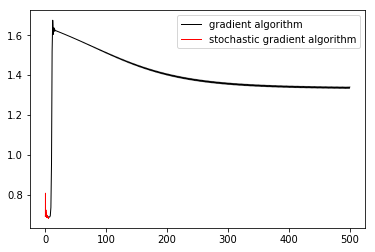

In [258]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.legend();

In [259]:
import timeit

def SAGA(f , f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    x_tab = np.copy(x)
    print("------------------------------------\n SAGA\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        
        e = np.random.choice(m)
                
        g = f_grad_ex(e,x)
        
        x = x - step*(g - p_tab[e,:] + sum(p_tab)/float(m) )
        
        p_tab[e,:] = np.copy(g)

        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [260]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 1/(2*(mu*m + L))

##### gradient algorithm
x_saga,x_saga_tab = SAGA(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SAGA
------------------------------------
START 
FINISHED -- 9999 iterations / 35.114347s -- final value: 0.970205




In [261]:
F_saga =  []
Ite_saga = []
for i in range(0,x_saga_tab.shape[0],int(x_saga_tab.shape[0]/500.0)):
    F_saga.append(f(x_saga_tab[i,:]))
    Ite_saga.append(i)

In [262]:
import timeit

def SVRG(f ,  f_grad_ex , x0 , step  , ITE_MAX ):
    x = np.copy(x0)
    p_tab = np.zeros((m,x0.size))
    
    M = 20
    
    x_tab = np.copy(x)
    print("------------------------------------\n SVRG\n------------------------------------\nSTART ")
    t_s =  timeit.default_timer()
    for k in range(int(ITE_MAX/M)):
        
        for i in range(m):
            p_tab[i,:] = f_grad_ex(i,x)
        
        true_grad = sum(p_tab)/float(m)
        
        for j in range(M):
            e = np.random.choice(m)
              
            g = f_grad_ex(e,x)
        
            x = x - step*(g - p_tab[e,:] +true_grad )
        
            x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,f(x)))
    return x,x_tab

In [263]:
#### Parameter we give at our algorithm 
ITE_MAX = 10000                      # Max number of iterations
x0      = np.zeros(n)              # Initial point
step    = 0.1/( L)

##### gradient algorithm
x_svrg,x_svrg_tab = SVRG(f , f_grad_ex , x0 , step  , ITE_MAX )

------------------------------------
 SVRG
------------------------------------
START 
FINISHED -- 499 iterations / 40.710763s -- final value: 0.666391




In [264]:
F_svrg =  []
Ite_svrg = []
for i in range(0,x_svrg_tab.shape[0],int(x_svrg_tab.shape[0]/500.0)):
    F_svrg.append(f(x_svrg_tab[i,:]))
    Ite_svrg.append(i)

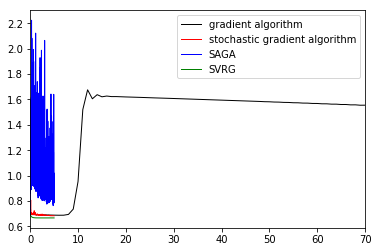

In [265]:
plt.plot( F, color="black", linewidth=1.0, linestyle="-", label="gradient algorithm");
plt.plot([x/float(m) for x in Ite_sto], F_sto, color="red", linewidth=1.0, linestyle="-", label="stochastic gradient algorithm");
plt.plot([x/float(m) for x in Ite_saga], F_saga, color="blue", linewidth=1.0, linestyle="-", label="SAGA");
plt.plot([x/float(m) for x in Ite_svrg], F_svrg, color="green", linewidth=1.0, linestyle="-", label="SVRG");
plt.xlim([0,70])
plt.legend();

In [266]:
yPredLogsvrg = np.sign( 1/(1.0 + np.exp( - (XTest.values).dot(x_svrg) )) - 0.5) # +1 if Prob (a) > 0.5

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(yTest, yPredLogsvrg)

sns.heatmap(mat, square=True, annot=True ,cbar=False, fmt='g');
plt.ylabel('true label');
plt.xlabel('predicted label');

In [ ]:
metrics.accuracy_score(yTest, yPredLogsvrg, normalize=True, sample_weight=None)

In [267]:
#Save results of first dataset

predicted_0=yPredLogsvrg


In [204]:
#Save results of second dataset

predicted_1=yPredLogsvrg


In [229]:
#Save results of third dataset

predicted_2=yPredLogsvrg


In [268]:
len(predicted_0)

1000

In [269]:
###Jouning datasets
pred_svrg = np.concatenate((predicted_0,predicted_1, predicted_2), axis =0)
Ids_svrg = [i for i in range (3000)]
d_svrg= {'Id' : Ids_svrg,'Bound': pred_svrg}

df= pd.DataFrame(d_svrg, columns = ['Id','Bound'])
df.to_csv("Predictions.csv", index=None)
dff=pd.read_csv("Predictions.csv")
dff.head()

,Id,Bound
0,0,-1.0
1,1,1.0
2,2,-1.0
3,3,1.0
4,4,-1.0
